In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from itertools import product

In [4]:
def avgnb(m):
    out = np.empty_like(m)
    nr, nc = m.shape[:2]
    
    for r, c in product(range(nr), range(nc)):
        val, n = 0.0, 0.0
        for i in range(max(0, r-1), min(nr, r+2)):
            for j in range(max(0, c-1), min(nc, c+2)):
                n += 1.0
                val += m[i, j]
        
        out[r, c] = (val - m[r, c]) / (n-1)
        
    return out

In [5]:
fontsize = 14

# Loading the data

## Nutrient data

In [6]:
s = np.load("substrate/computed.npy")

In [7]:
n_plates, n_rows, n_columns, n_points = s.shape
plates, rows, columns, points = map(np.arange, s.shape)

In [8]:
sbar = np.empty_like(s)
for p in plates:
    sbar[p] = avgnb(s[p])

In [9]:
params = pd.read_csv("diffusion-parameters/optimal.csv")

In [10]:
layers = np.empty((n_rows, n_columns))
for r, c in product(rows, columns):
    layers[r, c] = min(r, c, n_rows-1 - r, n_columns-1 - c)

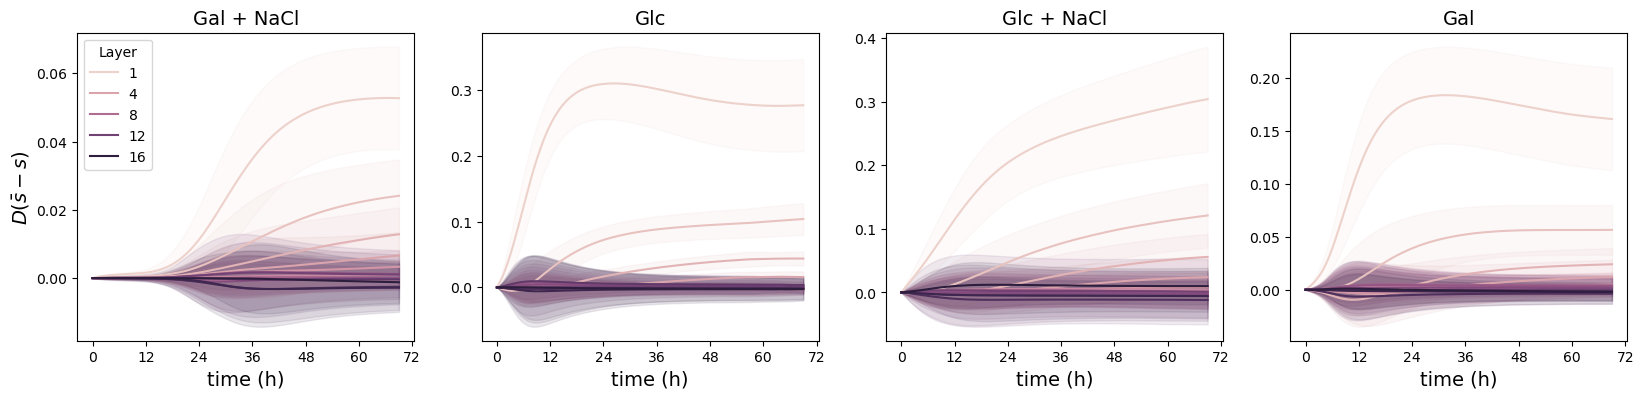

In [12]:
fig, axes = plt.subplots(ncols = 4, figsize = (20, 4))

palette = sns.cubehelix_palette(16)
titles = ("Gal + NaCl", "Glc", "Glc + NaCl", "Gal")

for p in plates:
    for k in range(16):
        dsbarms = params.loc[p, "D"] * (sbar[p] - s[p])[layers == k+3]
        avg, std = dsbarms.mean(axis = 0), dsbarms.std(axis = 0)
        axes[p].plot(avg, label = f"{k+1}", color = palette[k])
        axes[p].fill_between(points, avg - std, avg + std, color = palette[k], alpha = 0.1)
    axes[p].set_title(titles[p], fontsize = fontsize)
    axes[p].set_xlabel("time (h)", fontsize = fontsize)
    axes[p].set_xticks([0, 36, 72, 108, 144, 180, 216], labels = [0, 12, 24, 36, 48, 60, 72])
axes[0].set_ylabel(r"$D(\bar s - s)$", fontsize = fontsize)

_legend = axes[0].legend(fontsize = fontsize, title_fontsize = fontsize)
legend = axes[0].legend([ _legend.legendHandles[i-1] for i in [1, 4, 8, 12, 16] ], [1, 4, 8, 12, 16])
legend.set_title("Layer")

fig.savefig(f"plots/figure-4/diff-term.pdf", bbox_inches = "tight")
fig.savefig(f"plots/figure-4/diff-term.png", bbox_inches = "tight");